In [1]:
import shelve
with shelve.open("this_dataset") as dat:
    data节点=dat["data节点"]

In [2]:
import numpy as np
from numba import njit
@njit
def pjfunc(x:np.ndarray):
    return np.sqrt(np.sum(np.square(x)))

In [3]:
R=0
for i in data节点:
    R+=pjfunc(np.array(data节点[i]))
R/=len(data节点)

In [4]:
R

300.4000111215409

In [5]:
a=1/(0.466*2*R)

# 尝试顶点在原点，发现失败（伸缩量过大）

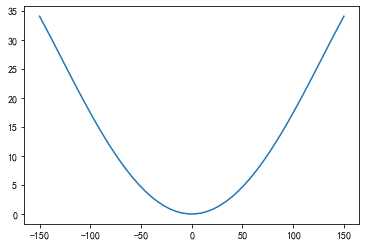

In [6]:
#y=a*x^2-R
import numpy as np
t=np.linspace(-150,150)
d=np.sqrt(np.square(t)+np.square(a*t**2-R))
import matplotlib.pyplot as plt
plt.plot(t,np.abs(d-R))

# 所有点都伸缩
计算所有可能的极值点

In [7]:
import sympy as sy
t,p=sy.symbols("t,p")
val=sy.sqrt(t**2+(t**2/(2*p)-sy.Rational(534,1000)*R-p/2)**2)-R
res=sy.solve(sy.diff(val,t),t)

In [8]:
res# 打印极值点

[0.0,
 -6.00212753600341e-15*sqrt(-p*(2.77580888431871e+28*p - 8.9055502506161e+30)),
 6.00212753600341e-15*sqrt(-p*(2.77580888431871e+28*p - 8.9055502506161e+30))]

In [9]:
susped=[]
for i in res+[-150,150]:# 添加端点
    susped.append(sy.simplify(val.subs(t,i)))

In [10]:
for i in susped: # 打印所有可能的最值点
    print(i)

160.413605938903*sqrt((0.00311694258771563*p + 1)**2) - 300.400011121541
17.9116501718241*sqrt(p + 2.53088044781459e-28) - 300.400011121541
17.9116501718241*sqrt(p + 2.53088044781459e-28) - 300.400011121541
11250.0*sqrt(0.000177777777777778 + (4.44444444444444e-5*p**2 + 0.0142589871945691*p - 1)**2/p**2) - 300.400011121541
11250.0*sqrt(0.000177777777777778 + (4.44444444444444e-5*p**2 + 0.0142589871945691*p - 1)**2/p**2) - 300.400011121541


画出图（在0.6以下的p范围为所求范围）

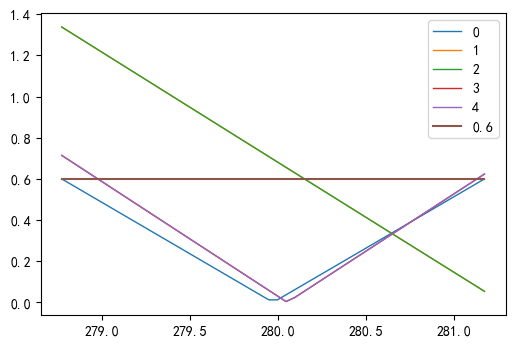

In [11]:
t=np.linspace(0.466*R-0.6,0.466*R+0.6)*2
fig=plt.figure(dpi=100)
for ii in range(len(susped)):
    plt.plot(t,[abs(susped[ii].subs(p,i)) for i in t],label=str(ii),linewidth=1)
plt.plot(t,[0.6 for i in t],label=0.6)
plt.legend()
plt.show()

求2与4的交点

In [12]:
resu1=sy.nsolve(-susped[2]-susped[4],p,280)
print(float(resu1))
float(-susped[2].subs(p,resu1))

280.6505555952178


0.332793212668264

求2与0的交点

In [13]:
resu2=sy.solve(-susped[2]-susped[0],p)
print(float(resu2[0]))
print(float(-susped[2].subs(p,resu2[0])))
sy.simplify(-susped[2].subs(p,resu2[0]))

280.6446794774304
0.335934556077234


0.335934556077234

求0与4的交点

In [14]:
resu3=sy.solve(susped[4]-susped[0],p)
for i in resu3:
    print(i)# 保留第二个结果

40.0702431376183
280.756968740196
624.939121110421 - 5835031104.25085*I
624.939121110421 + 5835031104.25085*I


In [15]:
print(float(resu3[1]))
print(float(susped[0].subs(p,resu3[1])))

280.75696874019565
0.3920791874597853


求可用范围

In [16]:
p1=sy.solve(-susped[2]-sy.Rational(6,10),p)[0]
print(float(p1))

280.15094524684145


In [17]:
p2=sy.solve(susped[4]-sy.Rational(6,10),p)[3]
print(p2)

281.130255084147


# 最优抛物面方程

In [18]:
print("z={}*(x^2+y^2)".format(1/(2*280.6446794774304))+"-{}".format(0.534*R+280.6446794774304/2))

z=0.001781612254082338*(x^2+y^2)-300.735945677618


$$z=0.001781612254082338(x^2+y^2)-300.735945677618$$